In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import class_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from matplotlib.pyplot import *
from scipy import stats

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from pandas import read_csv

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [27]:
dataset = read_csv("Week 1.csv", encoding="ISO-8859-1")
dataset2 = read_csv("Week 2.csv", encoding="ISO-8859-1")
dataset3 = read_csv("Week 3.csv", encoding="ISO-8859-1")
dataset4 = read_csv("Week 4.csv", encoding="ISO-8859-1")
dataset5 = read_csv("Week 5.csv", encoding="ISO-8859-1")


df=dataset[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]
df_week2=dataset2[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]
df_week3=dataset3[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]
df_week4=dataset4[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]
df_week5=dataset5[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]


df2=read_csv("Testing dataset.csv", encoding="ISO-8859-1")
df3=read_csv("Testing result.csv", encoding="ISO-8859-1")


warnings.filterwarnings("ignore")

In [3]:
df.head()

,viewed,explored,certified,grade,nevents,ndays_act,nchapters,LoE_DI,Last event date,Completed_or_not
0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,1.374863e+09,0.0
1,1.0,0.0,0.0,0.0,107.0,8.0,2.0,4.0,1.356287e+09,0.0
2,1.0,0.0,0.0,0.0,8.0,1.0,1.0,0.0,1.364409e+09,0.0
3,1.0,0.0,0.0,0.0,25.0,2.0,4.0,4.0,1.373827e+09,0.0
4,0.0,0.0,0.0,0.0,3.0,2.0,0.0,3.0,1.345833e+09,0.0


In [4]:
print(df2['certified'].value_counts())

print(df2.head())
print(df3.head())
print(df2.shape[0])
print(df3.shape[0])

0.0    56930
1.0     2348
Name: certified, dtype: int64
   Unnamed: 0  viewed  explored  grade  nevents  ndays_act  nchapters  LoE_DI  \
0           0     0.0       0.0   0.00      0.0        0.0        0.0     0.0   
1           1     1.0       0.0   0.01    879.0        5.0        3.0     4.0   
2           2     1.0       0.0   0.00    547.0        8.0        2.0     0.0   
3           3     0.0       0.0   0.00      2.0        1.0        0.0     4.0   
4           4     1.0       0.0   0.00    655.0        6.0        3.0     3.0   

   last_event_DI  certified  
0   1.325356e+09        0.0  
1   1.350499e+09        0.0  
2   1.334083e+09        0.0  
3   1.348598e+09        0.0  
4   1.350067e+09        0.0  
   0  Completed_or_not
0  1                 0
1  2                 0
2  3                 0
3  4                 0
4  5                 0
59278
59278


In [5]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8]]
y=df.iloc[:,[9]]
print(y['Completed_or_not'].value_counts())

0.0    81400
1.0     2134
Name: Completed_or_not, dtype: int64


In [6]:
Z=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]
yy=df3.iloc[:,[1]]
print(yy['Completed_or_not'].value_counts())
#yy.shape[0]

0    57538
1     1740
Name: Completed_or_not, dtype: int64


In [7]:
Z.head()

,viewed,explored,certified,grade,nevents,ndays_act,nchapters,LoE_DI,last_event_DI
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.325356e+09
1,1.0,0.0,0.0,0.01,879.0,5.0,3.0,4.0,1.350499e+09
2,1.0,0.0,0.0,0.00,547.0,8.0,2.0,0.0,1.334083e+09
3,0.0,0.0,0.0,0.00,2.0,1.0,0.0,4.0,1.348598e+09
4,1.0,0.0,0.0,0.00,655.0,6.0,3.0,3.0,1.350067e+09


In [8]:
yy.head()

,Completed_or_not
0,0
1,0
2,0
3,0
4,0


In [9]:
print(type(X))
print(type(y))
print(type(Z))
print(type(yy))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
X=X.values
#y=y.values
print(type(X))
Z=Z.values
all_classes=['Not Completed','Completed']

<class 'numpy.ndarray'>


In [11]:
#Performing Z-Score Normalization

X=stats.zscore(X)
Z=stats.zscore(Z)

In [12]:
model = Sequential()
#First layer has  12 neurons with 9 input neurons from input layer

#Adding dropout between the input layer and the first hidden layer
model.add(Dense(12, input_dim=9, activation='softmax'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(8, activation='softmax'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.2))

In [13]:
#We will use logarithmic loss, which for a binary classification problem is defined as “binary_crossentropy“.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Fit the model
history=model.fit(X, y, epochs=150, batch_size=35, validation_split=0.25)

Train on 62650 samples, validate on 20884 samples
Epoch 1/150
62650/62650 [==============================] - 4s 58us/step - loss: 0.2216 - acc: 0.9498 - val_loss: 0.0645 - val_acc: 0.9977
Epoch 2/150
62650/62650 [==============================] - 3s 41us/step - loss: 0.0559 - acc: 0.9956 - val_loss: 0.0220 - val_acc: 0.9996
Epoch 3/150
62650/62650 [==============================] - 3s 44us/step - loss: 0.0254 - acc: 0.9990 - val_loss: 0.0101 - val_acc: 0.9997
Epoch 4/150
62650/62650 [==============================] - 3s 40us/step - loss: 0.0131 - acc: 0.9992 - val_loss: 0.0057 - val_acc: 0.9994
Epoch 5/150
62650/62650 [==============================] - 3s 43us/step - loss: 0.0076 - acc: 0.9992 - val_loss: 0.0038 - val_acc: 0.9995
Epoch 6/150
62650/62650 [==============================] - 3s 47us/step - loss: 0.0051 - acc: 0.9992 - val_loss: 0.0024 - val_acc: 0.9996
Epoch 7/150
62650/62650 [==============================] - 3s 45us/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0023 - 

Epoch 59/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0014 - acc: 0.9994 - val_loss: 0.0013 - val_acc: 0.9997
Epoch 60/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.0011 - val_acc: 0.9997
Epoch 61/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 8.9848e-04 - val_acc: 0.9998
Epoch 62/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0011 - acc: 0.9995 - val_loss: 0.0011 - val_acc: 0.9998
Epoch 63/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 9.2185e-04 - val_acc: 0.9998
Epoch 64/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0010 - acc: 0.9996 - val_loss: 9.3830e-04 - val_acc: 0.9998
Epoch 65/150
62650/62650 [==============================] - 2s 36us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 9.1100e-04 - val_acc: 0.9999
Epoch 66/15

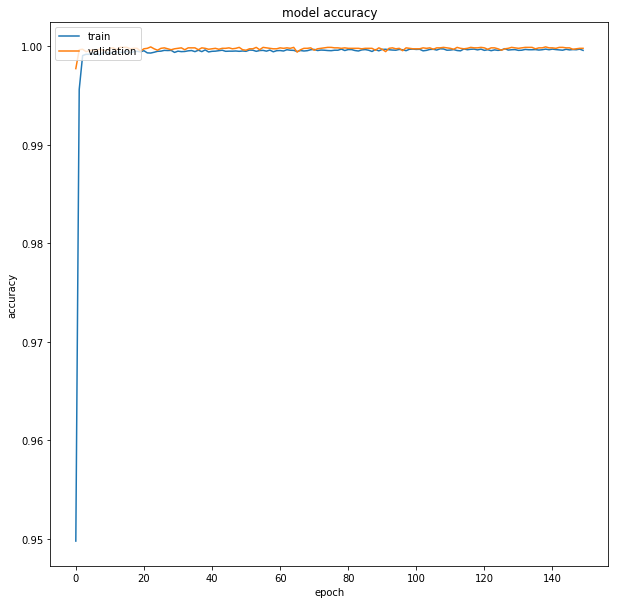

In [15]:
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

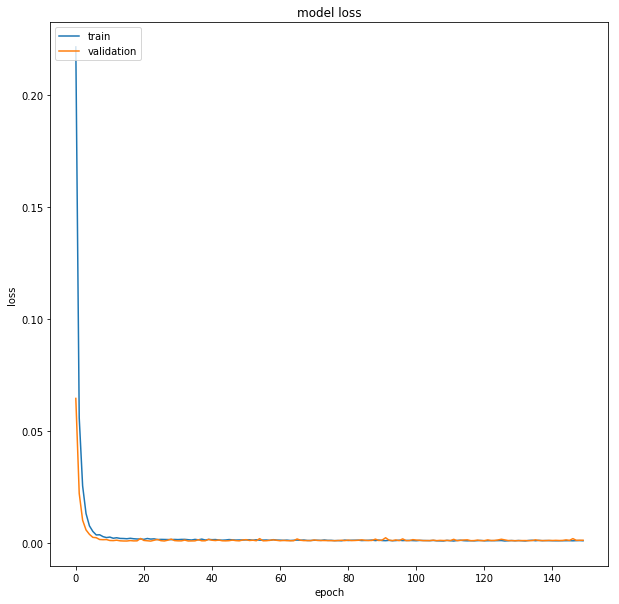

In [16]:
# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# show the inputs and predicted outputs
#predictions for test dataset
predictions = model.predict_classes(Z)
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), predictions[i]))

In [17]:
unique, counts = np.unique(predictions, return_counts=True)

print (np.asarray((unique, counts)).T)

In [32]:
probability = (model.predict_proba(Z))
df_week1_prob=pd.DataFrame({'Week 1 Probability':probability[:,0]})
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), probability[i]))
    
df2=pd.concat([df2,df_week1_prob],axis=1)

In [61]:
probability = (model.predict_proba(X))

df_week1_prob=pd.DataFrame({'Week 1 Probability':probability[:,0]})
df_week1_prob.shape
df_week2=pd.concat([df_week2,df_week1_prob],axis=1)

In [20]:
# Evaluate the model
scores = model.evaluate(Z, yy)
#print(history.history.keys())
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

59278/59278 [==============================] - 1s 14us/step

loss: 15.82%

acc: 98.38%


In [21]:
print("Number of mislabeled points out of a total %d points : %d \n\n" % (Z.shape[0],(yy != predictions).sum()))

Number of mislabeled points out of a total 59278 points : 960 




Confusion matrix, without normalization
[[57175   363]
 [  597  1143]]


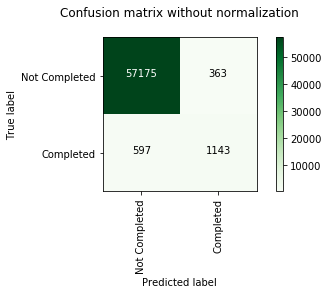

In [22]:
#pre_cls=model.predict_classes(X)    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization\n')

In [23]:
print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57538
           1       0.76      0.66      0.70      1740

   micro avg       0.98      0.98      0.98     59278
   macro avg       0.87      0.83      0.85     59278
weighted avg       0.98      0.98      0.98     59278

Recall score:  0.656896551724138
Precision score:  0.9828944245988551


Area under Curve: 0.825


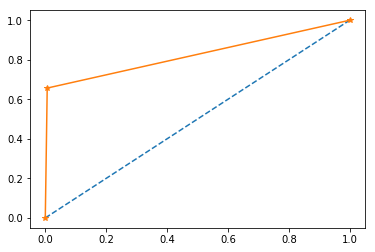

In [24]:
# Plot the ROC curve for the model

auc = roc_auc_score(yy, predictions)
print('Area under Curve: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(yy, predictions)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr,tpr, marker='*')
pyplot.show()

In [63]:
df2.head()

,Unnamed: 0,viewed,explored,grade,nevents,ndays_act,nchapters,LoE_DI,last_event_DI,certified,Week 1 Probability
0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.325356e+09,0.0,0.000003
1,1,1.0,0.0,0.01,879.0,5.0,3.0,4.0,1.350499e+09,0.0,0.000003
2,2,1.0,0.0,0.00,547.0,8.0,2.0,0.0,1.334083e+09,0.0,0.000003
3,3,0.0,0.0,0.00,2.0,1.0,0.0,4.0,1.348598e+09,0.0,0.000003
4,4,1.0,0.0,0.00,655.0,6.0,3.0,3.0,1.350067e+09,0.0,0.000003


In [ ]:
# Week 2 classification

In [77]:
X2=df_week2.iloc[:,[0,1,2,3,4,5,6,7,8]]
y2=df_week2.iloc[:,[9]]
Z2=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]

In [78]:
#Performing Z-Score Normalization

X2=stats.zscore(X2)
Z2=stats.zscore(Z2)

In [79]:
model = Sequential()
#First layer has  12 neurons with 9 input neurons from input layer

#Adding dropout between the input layer and the first hidden layer
model.add(Dense(12, input_dim=9, activation='softmax'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(8, activation='softmax'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.2))

In [80]:
#We will use logarithmic loss, which for a binary classification problem is defined as “binary_crossentropy“.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
# Fit the model
history=model.fit(X2, y2, epochs=100, batch_size=35, validation_split=0.15)

Train on 71003 samples, validate on 12531 samples
Epoch 1/100
71003/71003 [==============================] - 4s 52us/step - loss: 0.0113 - acc: 0.9972 - val_loss: 0.0033 - val_acc: 0.9987
Epoch 2/100
71003/71003 [==============================] - 4s 55us/step - loss: 0.0028 - acc: 0.9987 - val_loss: 0.0017 - val_acc: 0.9990
Epoch 3/100
71003/71003 [==============================] - 9s 132us/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0014 - val_acc: 0.9994
Epoch 4/100
71003/71003 [==============================] - 4s 62us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.0017 - val_acc: 0.9994
Epoch 5/100
71003/71003 [==============================] - 3s 46us/step - loss: 0.0010 - acc: 0.9996 - val_loss: 0.0014 - val_acc: 0.9995
Epoch 6/100
71003/71003 [==============================] - 6s 83us/step - loss: 7.5247e-04 - acc: 0.9996 - val_loss: 0.0024 - val_acc: 0.9994
Epoch 7/100
71003/71003 [==============================] - 5s 65us/step - loss: 7.4708e-04 - acc: 0.9997 - val_loss: 

In [124]:
# show the inputs and predicted outputs
#predictions for test dataset
predictions = model.predict_classes(Z2)
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), predictions[i]))


unique, counts = np.unique(predictions, return_counts=True)

print (np.asarray((unique, counts)).T)

[[    0 59146]
 [    1   132]]


In [125]:
# Evaluate the model
scores = model.evaluate(Z2, yy)
#print(history.history.keys())
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

59278/59278 [==============================] - 2s 29us/step

loss: 42.12%

acc: 97.21%


In [126]:
print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     57538
           1       0.83      0.06      0.12      1740

   micro avg       0.97      0.97      0.97     59278
   macro avg       0.90      0.53      0.55     59278
weighted avg       0.97      0.97      0.96     59278

Recall score:  0.06321839080459771
Precision score:  0.9683578181881872


Confusion matrix, without normalization
[[57516    22]
 [ 1630   110]]


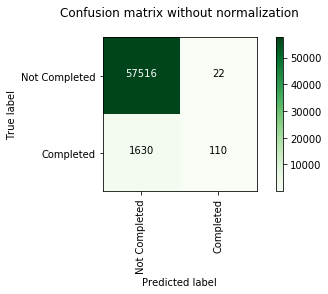

In [127]:
cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization\n')

In [ ]:
# WEEK 3 classification

In [86]:
X3=df_week3.iloc[:,[0,1,2,3,4,5,6,7,8]]
y3=df_week3.iloc[:,[9]]
Z3=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]

In [87]:
#Performing Z-Score Normalization

X3=stats.zscore(X3)
Z3=stats.zscore(Z3)

In [88]:
model = Sequential()
#First layer has  12 neurons with 9 input neurons from input layer

#Adding dropout between the input layer and the first hidden layer
model.add(Dense(12, input_dim=9, activation='softmax'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(8, activation='softmax'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.2))

In [89]:
#We will use logarithmic loss, which for a binary classification problem is defined as “binary_crossentropy“.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
# Fit the model
history=model.fit(X3, y3, epochs=100, batch_size=35, validation_split=0.25)

Train on 62650 samples, validate on 20884 samples
Epoch 1/100
62650/62650 [==============================] - 3s 53us/step - loss: 0.1700 - acc: 0.9642 - val_loss: 0.0830 - val_acc: 0.9965
Epoch 2/100
62650/62650 [==============================] - 3s 44us/step - loss: 0.0459 - acc: 0.9978 - val_loss: 0.0401 - val_acc: 0.9944
Epoch 3/100
62650/62650 [==============================] - 3s 45us/step - loss: 0.0215 - acc: 0.9985 - val_loss: 0.0201 - val_acc: 0.9970
Epoch 4/100
62650/62650 [==============================] - 3s 45us/step - loss: 0.0117 - acc: 0.9988 - val_loss: 0.0116 - val_acc: 0.9984
Epoch 5/100
62650/62650 [==============================] - 3s 45us/step - loss: 0.0070 - acc: 0.9989 - val_loss: 0.0064 - val_acc: 0.9990
Epoch 6/100
62650/62650 [==============================] - 3s 46us/step - loss: 0.0049 - acc: 0.9990 - val_loss: 0.0046 - val_acc: 0.9990
Epoch 7/100
62650/62650 [==============================] - 3s 52us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0030 - 

In [91]:
# show the inputs and predicted outputs
#predictions for test dataset
predictions = model.predict_classes(Z3)
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), predictions[i]))


unique, counts = np.unique(predictions, return_counts=True)

print (np.asarray((unique, counts)).T)

[[    0 56768]
 [    1  2510]]


In [92]:
# Evaluate the model
scores = model.evaluate(Z3, yy)
#print(history.history.keys())
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

59278/59278 [==============================] - 1s 19us/step

loss: 15.93%

acc: 98.19%


In [93]:
print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     57538
           1       0.63      0.91      0.75      1740

   micro avg       0.98      0.98      0.98     59278
   macro avg       0.82      0.95      0.87     59278
weighted avg       0.99      0.98      0.98     59278

Recall score:  0.9132183908045977
Precision score:  0.986647486211914


Confusion matrix, without normalization
[[56617   921]
 [  151  1589]]


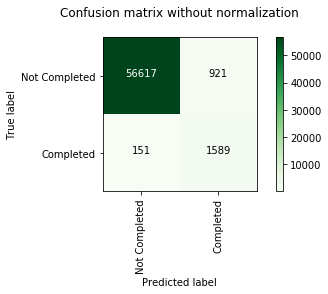

In [94]:
cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization\n')

In [ ]:
# Week 4 classification

In [104]:
X4=df_week4.iloc[:,[0,1,2,3,4,5,6,7,8]]
y4=df_week4.iloc[:,[9]]
Z4=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]

In [105]:
#Performing Z-Score Normalization

X4=stats.zscore(X4)
Z4=stats.zscore(Z4)

In [106]:
model = Sequential()
#First layer has  12 neurons with 9 input neurons from input layer

#Adding dropout between the input layer and the first hidden layer
model.add(Dense(12, input_dim=9, activation='softmax'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(8, activation='softmax'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.2))

In [107]:
#We will use logarithmic loss, which for a binary classification problem is defined as “binary_crossentropy“.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
# Fit the model
history=model.fit(X4, y4, epochs=100, batch_size=35, validation_split=0.25)

Train on 62650 samples, validate on 20884 samples
Epoch 1/100
62650/62650 [==============================] - 4s 66us/step - loss: 0.2165 - acc: 0.9659 - val_loss: 0.0965 - val_acc: 0.9913
Epoch 2/100
62650/62650 [==============================] - 3s 53us/step - loss: 0.0535 - acc: 0.9970 - val_loss: 0.0460 - val_acc: 0.9925
Epoch 3/100
62650/62650 [==============================] - 4s 58us/step - loss: 0.0244 - acc: 0.9980 - val_loss: 0.0238 - val_acc: 0.9962
Epoch 4/100
62650/62650 [==============================] - 5s 74us/step - loss: 0.0137 - acc: 0.9983 - val_loss: 0.0162 - val_acc: 0.9963
Epoch 5/100
62650/62650 [==============================] - 3s 55us/step - loss: 0.0085 - acc: 0.9986 - val_loss: 0.0154 - val_acc: 0.9951
Epoch 6/100
62650/62650 [==============================] - 4s 56us/step - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0097 - val_acc: 0.9969
Epoch 7/100
62650/62650 [==============================] - 3s 55us/step - loss: 0.0045 - acc: 0.9990 - val_loss: 0.0094 - 

In [109]:
# show the inputs and predicted outputs
#predictions for test dataset
predictions = model.predict_classes(Z4)
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), predictions[i]))


unique, counts = np.unique(predictions, return_counts=True)

print (np.asarray((unique, counts)).T)

[[    0 57074]
 [    1  2204]]


In [110]:
# Evaluate the model
scores = model.evaluate(Z4, yy)
#print(history.history.keys())
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

59278/59278 [==============================] - 1s 25us/step

loss: 12.24%

acc: 98.50%


In [111]:
print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     57538
           1       0.69      0.88      0.77      1740

   micro avg       0.99      0.99      0.99     59278
   macro avg       0.84      0.93      0.88     59278
weighted avg       0.99      0.99      0.99     59278

Recall score:  0.8781609195402299
Precision score:  0.9873914820445342


Confusion matrix, without normalization
[[56862   676]
 [  212  1528]]


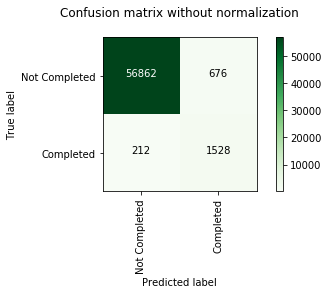

In [112]:
cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization\n')

In [ ]:
#Week 5 classification

In [113]:
X5=df_week5.iloc[:,[0,1,2,3,4,5,6,7,8]]
y5=df_week5.iloc[:,[9]]
Z5=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]

In [114]:
#Performing Z-Score Normalization

X5=stats.zscore(X5)
Z5=stats.zscore(Z5)

In [115]:
model = Sequential()
#First layer has  12 neurons with 9 input neurons from input layer

#Adding dropout between the input layer and the first hidden layer
model.add(Dense(12, input_dim=9, activation='softmax'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(8, activation='softmax'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.2))

In [116]:
#We will use logarithmic loss, which for a binary classification problem is defined as “binary_crossentropy“.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
# Fit the model
history=model.fit(X5, y5, epochs=100, batch_size=35, validation_split=0.15)

Train on 71003 samples, validate on 12531 samples
Epoch 1/100
71003/71003 [==============================] - 4s 50us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.0036 - val_acc: 0.9994
Epoch 2/100
71003/71003 [==============================] - 4s 50us/step - loss: 0.0014 - acc: 0.9994 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 3/100
71003/71003 [==============================] - 4s 50us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 4/100
71003/71003 [==============================] - 4s 55us/step - loss: 0.0013 - acc: 0.9994 - val_loss: 0.0049 - val_acc: 0.9991
Epoch 5/100
71003/71003 [==============================] - 4s 55us/step - loss: 0.0013 - acc: 0.9995 - val_loss: 0.0037 - val_acc: 0.9994
Epoch 6/100
71003/71003 [==============================] - 4s 58us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.0037 - val_acc: 0.9994
Epoch 7/100
71003/71003 [==============================] - 4s 52us/step - loss: 0.0014 - acc: 0.9994 - val_loss: 0.0039 - 

In [119]:
# show the inputs and predicted outputs
#predictions for test dataset
predictions = model.predict_classes(Z5)
#for i in range(len(Z)):
 #   print("X=%s, Predicted=%s" % (Z[i].astype(int), predictions[i]))


unique, counts = np.unique(predictions, return_counts=True)

print (np.asarray((unique, counts)).T)

[[    0 57378]
 [    1  1900]]


In [120]:
# Evaluate the model
scores = model.evaluate(Z5, yy)
#print(history.history.keys())
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

59278/59278 [==============================] - 1s 23us/step

loss: 13.80%

acc: 98.65%


In [121]:
print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57538
           1       0.75      0.82      0.78      1740

   micro avg       0.99      0.99      0.99     59278
   macro avg       0.87      0.90      0.89     59278
weighted avg       0.99      0.99      0.99     59278

Recall score:  0.8166666666666667
Precision score:  0.9872034701332786


Confusion matrix, without normalization
[[57059   479]
 [  319  1421]]


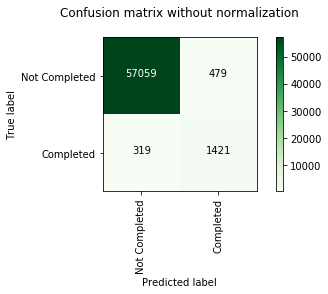

In [122]:
cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization\n')